# Task Summary

Following is the EDA through the real wold data scraped from the AutoScout24.de website. Firstly, I am going to do some data cleaning process before.  

In [24]:
import pandas as pd
import numpy as np
import json
import warnings
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.max_info_rows', 2000)
# pd.set_option('display.expand_frame_repr', True)
# pd.set_option('display.width', 2000)


warnings.filterwarnings("ignore")
warnings.warn("thus will not show")

In [25]:
df_auto = pd.read_json('scout_car/scout_car.json', orient = 'records' ,lines = True)

In [26]:
df_auto.head()


,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\nLangstreckenfahrzeug daher die hohe Kilometerl

In [11]:
df_auto.shape

(15919, 54)

In [12]:
df_auto.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type', 'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty', 'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model', 'Offer Number', 'First Registration', 'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n', 'description', 'Emission Label', 'Gears', 'Country version', 'Electricity consumption', 'Last Service Date', 'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date', 'Available from'], dtype='object')

In [13]:
df_auto.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [14]:
df_auto.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [15]:
df_auto.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type', 'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty', 'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model', 'Offer Number', 'First Registration', 'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n', 'description', 'Emission Label', 'Gears', 'Country version', 'Electricity consumption', 'Last Service Date', 'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date', 'Available from'], dtype='object')

#### the columns will be droped

- description
- null
- url
- Make
- Model
- kW
- Offer Number
- country version
- Electricity consumption          15782
- Last Service Date                15353
- Other Fuel Types                 15039
- Availability                     15284
- Last Timing Belt Service Date    15903
- Available from                   15647
- body color original 
- short description
- Type
- Full service
- Next Inspection                  12384
- Inspection new                   11987
- non-smoking vehicle
- first registration
- paint type
- body color original
- model code
#### the cloumns are important

*****************
##### p.s.
array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)
*****************

- make model
- registration mm/yyyy
- km
- body type
- price
- Fuel
- cylinders
- hp
- CO2 Emission
- Gearing Type
- Displacement
- consumption ( combined can be taken)
- Gears
- \nComfort & Convenience\n          920 (number of features ?)
- \nEntertainment & Media\n         1374 (number of features ?)
- \nExtras\n                        2962 (number of features ?)
- Drive chain ?????
- Body                                60
- Nr. of Doors                       212
- Nr. of Seats                       977
- weight
- upholstery  (cloth or leder ?)
- body color
- vat (~ 2/3 of the cars are vat deductible, 2.6 % of the cars are price negotiable, use this informations by filling missing values)
- number of prewious owner (sample or choice)
  

1. previous owner     8294
   2. previous owners     778
   3. previous owners      17
   4. previous owners       2
- warranty ???? %d%d months can be taken 

In [8]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [9]:
df.drop(labels = ['url', 'description','short_description', 'null', 'Make','Model', 'kW','Offer Number', 'Country version',
        'Electricity consumption',
        'Last Service Date',
        'Other Fuel Types',
        'Availability',
        'Last Timing Belt Service Date',
        'Available from',
        'Body Color Original',
        'Type',
        'Full Service',
        'Next Inspection',
        'Inspection new',
        'Non-smoking Vehicle',
        'Paint Type',
        'Emission Label',
        'Model Code',
        'prev_owner'], axis = 1, inplace = True)

In [10]:
df.shape

(15919, 29)

In [13]:
df.isnull().sum()*100 / df.shape[0]

make_model                    0.000000
body_type                     0.376908
price                         0.000000
vat                          28.349771
km                            0.000000
registration                  0.000000
hp                            0.000000
Previous Owners              41.711163
Warranty                     34.047365
First Registration           10.032037
Body Color                    3.750236
Upholstery                   23.368302
Body                          0.376908
Nr. of Doors                  1.331742
Nr. of Seats                  6.137320
Gearing Type                  0.000000
Displacement                  3.115774
Cylinders                    35.680633
Weight                       43.809285
Drive chain                  43.080596
Fuel                          0.000000
Consumption                  11.973114
CO2 Emission                 11.357497
Emission Class               18.977323
\nComfort & Convenience\n     5.779257
\nEntertainment & Media\n

## Dropping some rows by price

In [11]:
df['price'].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [11]:
df.price.nsmallest(4)
#the smallest will be dropped

8594     13
8828    120
6066    255
8829    331
Name: price, dtype: int64

In [12]:
df.drop(df.price.nsmallest(4).index, inplace = True)

In [21]:
df.price.nsmallest(4)

8594     13
8828    120
6066    255
8829    331
Name: price, dtype: int64

In [14]:
df.price.describe()

count    15915.000000
mean     18024.380584
std       7381.679318
min       4950.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [15]:
# df[df.price > 21900].shape

(3971, 29)

In [16]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

In [17]:
# outliers = (df.price > Q3 + 3*IQR) | (df.price < Q1 - 3*IQR)
# # to prevent the data loss I used 3*IQR
# df = df[~outliers]

In [18]:
# df.price.describe()

count    15861.000000
mean     17896.955867
std       7055.628341
min       4950.000000
25%      12820.000000
50%      16900.000000
75%      21900.000000
max      48990.000000
Name: price, dtype: float64

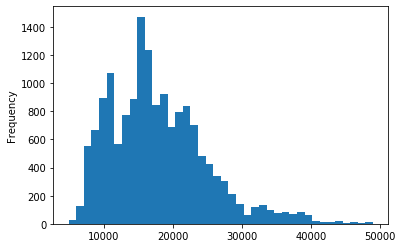

In [19]:
# df.price.plot(kind='hist',bins= 40);

In [20]:
df.km = df.km.str.replace(",","",regex = True)

In [21]:
df.km = df.km.str.extract('(\d+)')

In [22]:
df.km.fillna(value = 999999999, inplace=True)

In [23]:
df.km.astype(int)

0            56013
1            80000
2            83450
3            73000
4            16200
           ...    
15914    999999999
15915         9900
15916           15
15917           10
15918    999999999
Name: km, Length: 15861, dtype: int32

In [31]:
# df.replace(999999999, np.nan)
df.replace(999999999, np.nan,inplace = True)
#teh artificial values in price column are converted to null values 

In [32]:
df.isnull().sum()

make_model                      0
body_type                      60
price                           0
vat                          4498
km                           1020
registration                    0
hp                              0
Previous Owners              6593
Warranty                     5393
First Registration           1591
Body Color                    597
Upholstery                   3707
Body                           60
Nr. of Doors                  212
Nr. of Seats                  967
Gearing Type                    0
Displacement                  496
Cylinders                    5675
Weight                       6969
Drive chain                  6829
Fuel                            0
Consumption                  1902
CO2 Emission                 1795
Emission Class               3004
\nComfort & Convenience\n     920
\nEntertainment & Media\n    1374
\nExtras\n                   2962
\nSafety & Security\n         982
Gears                        4703
dtype: int64

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914      NaN
15915     9900
15916       15
15917       10
15918      NaN
Name: km, Length: 15861, dtype: object

In [28]:
df[["prev_owner", "Previous Owners"]].sample(55)


,prev_owner,Previous Owners
2851,None,NaN
12733,None,NaN
10482,1 previous owner,\n1\n
15117,None,NaN
1381,1 previous owner,\n1\n
7838,None,NaN
12424,None,NaN
3380,None,NaN
2498,None,NaN
1179,None,NaN


In [6]:
data = []
with open('scout_car/scout_car.json') as f:
    for line in f:
        data.append(json.loads(line))



dfcc = pd.json_normalize(data = df['\nComfort & Convenience\n'].to_dict(), max_level=1)
dfcc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,15669,15670,15671,15672,15673,15674,15675,15676,15677,15678,15679,15680,15681,15682,15683,15684,15685,15686,15687,15688,15689,15690,15691,15692,15693,15694,15695,15696,15697,15698,15699,15700,15701,15702,15703,15704,15705,15706,15707,15708,15709,15710,15711,15712,15713,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723,15724,15725,15726,15727,15728,15729,15730,15731,15732,15733,15734,15735,15736,15737,15738,15739,15740,15741,15742,15743,15744,15745,15746,15747,15748,15749,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763,15764,15765,15766,15767,15768,15769,15770,15771,15772,15773,15774,15775,15776,15777,15778,15779,15780,15781,15782,15783,15784,15785,15786,15787,15788,15789,15790,15791,15792,15793,15794,15795,15796,15797,15798,15799,15800,15801,15802,15803,15804,15805,15806,15807,15808,15809,15810,15811,15812,15813,15814,15815,15816,15817,15818,15819,15820,15821,15822,15823,15824,15825,15826,15827,15828,15829,15830,15831,15832,15833,15834,15835,15836,15837,15838,15839,15840,15841,15842,15843,15844,15845,15846,15847,15848,15849,15850,15851,15852,15853,15854,15855,15856,15857,15858,15859,15860,15861,15862,15863,15864,15865,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
0,"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Air conditioning, Armrest, Automatic climate control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Start-stop system]","[Air conditioning, Armrest, Automatic climate control, Electrical side mirrors, Hill Holder, Keyless central door lock, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Park Distance Control, 